# World Happiness Report!😊

**Importing Important Libraries.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Highlighting the maixmum values of each attribute in the data set**

In [5]:
df=pd.read_csv('C:\Users\preet\Desktop\DMA-project-main\DMA-project-main\2020.csv')
df.head()
original=df.copy()
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max, subset=['score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2568333890.py, line 1)

**Checking out the shape of our dataset!**

In [4]:
df.shape

(153, 9)

**Finding out attributes which are highly correlated to each other through heatmap.**

<AxesSubplot:>

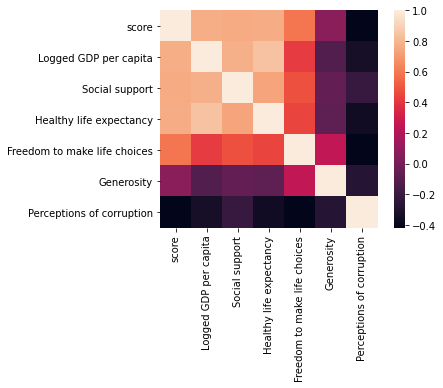

In [5]:
corrmat = df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

**Plotting pairwise relationships in the dataset.**

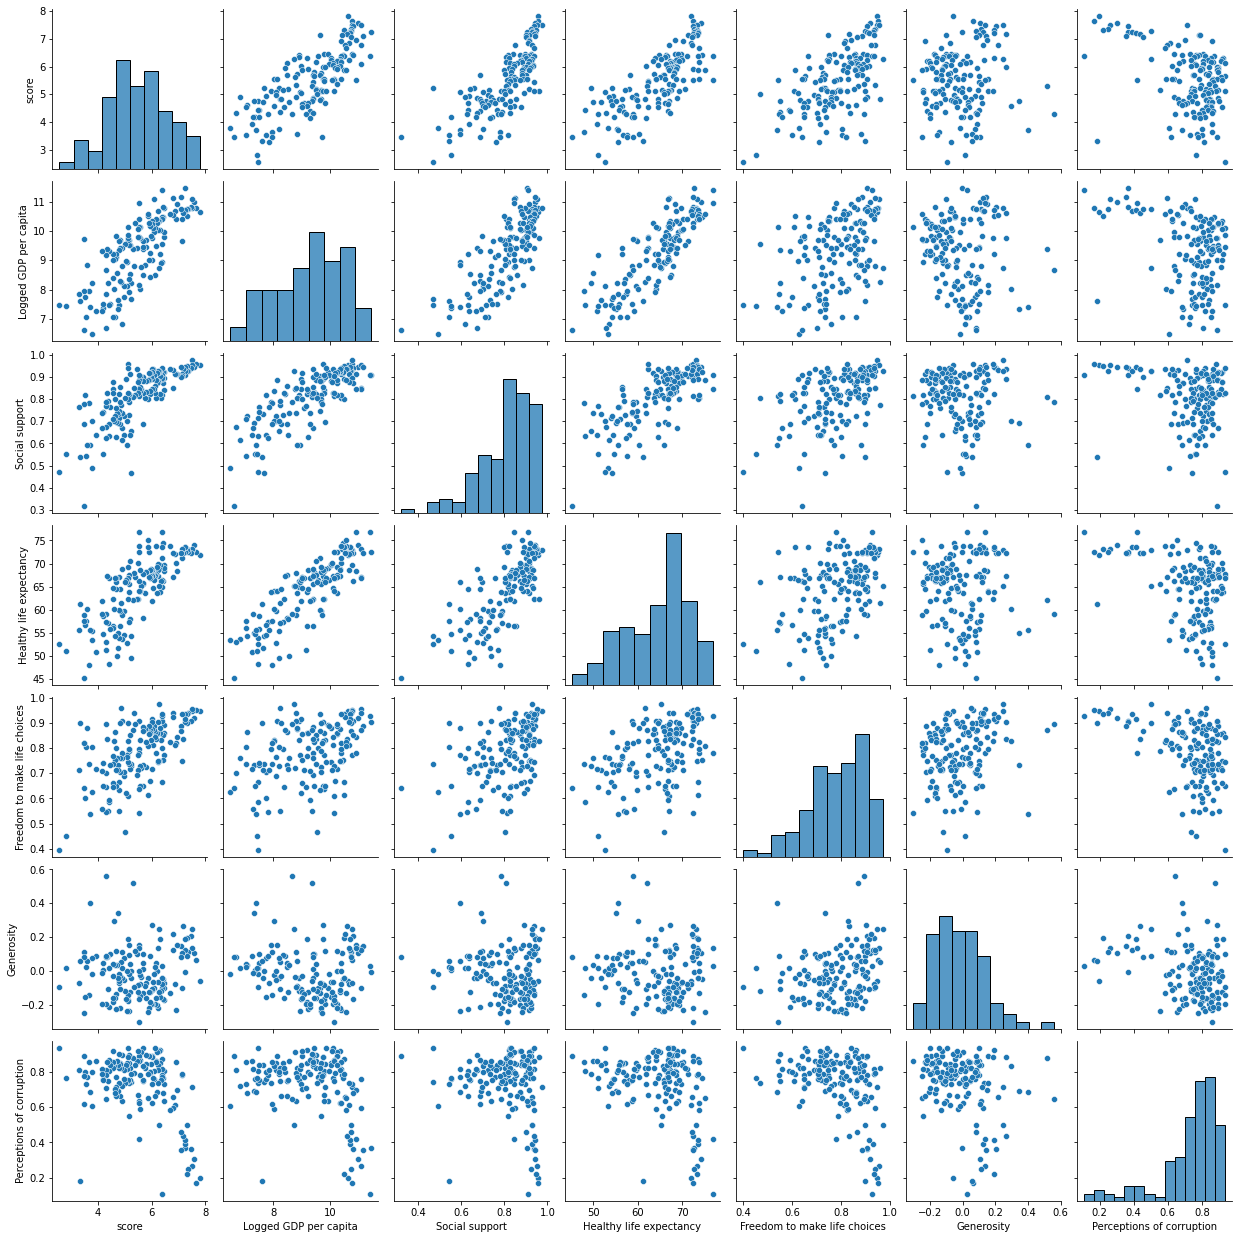

In [6]:
sns.pairplot(df)

**Top 10 countries for each attribute.**

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Country name'>

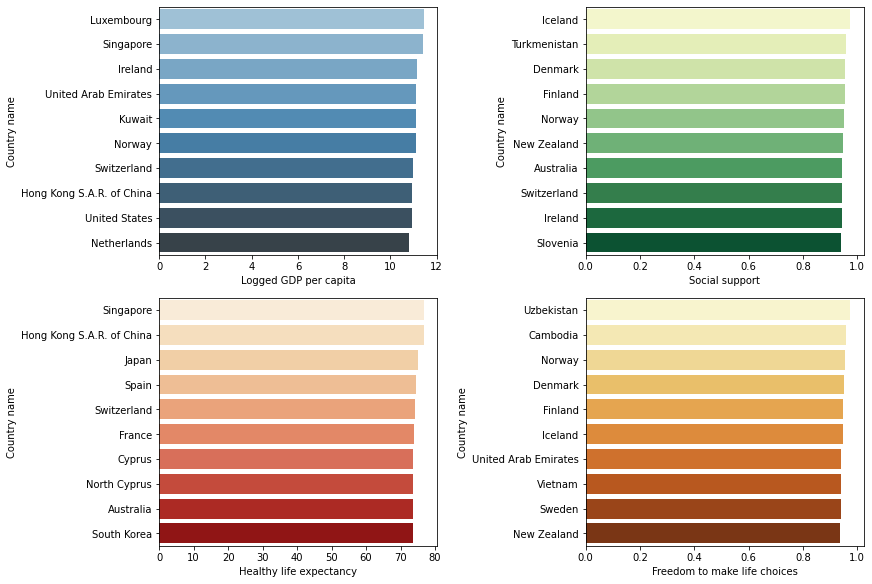

In [8]:

fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Logged GDP per capita',y='Country name',data=df.nlargest(10,'Logged GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country name',data=df.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country name',data=df.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country name',data=df.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Country name'>

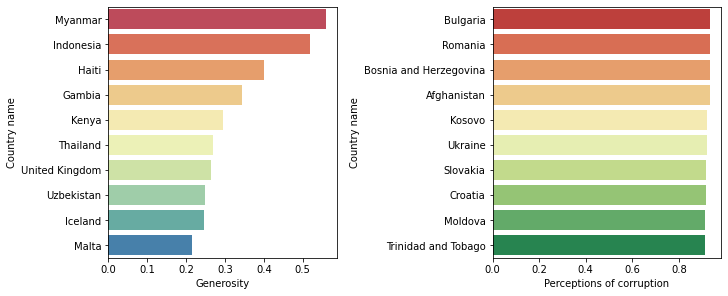

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country name',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perceptions of corruption' ,y='Country name',data=df.nlargest(10,'Perceptions of corruption'),ax=axes[1],palette='RdYlGn')

**Now I want to give a category to each country as High,Mid and Low according to their happiness scores.Thus we have to find out the bound in which these categories shall lie in.**

In [11]:
print('max:',df['score'].max())
print('min:',df['score'].min())
add=df['score'].max()-df['score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.808700085
min: 2.566900015
range difference: 1.747


In [13]:
low=df['score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['score'].max())

upper bound of Low grp 4.313900015
upper bound of Mid grp 6.060900015
upper bound of High grp max: 7.808700085


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  153 non-null    object 
 1   Regional indicator            153 non-null    object 
 2   score                         153 non-null    float64
 3   Logged GDP per capita         153 non-null    float64
 4   Social support                153 non-null    float64
 5   Healthy life expectancy       153 non-null    float64
 6   Freedom to make life choices  153 non-null    float64
 7   Generosity                    153 non-null    float64
 8   Perceptions of corruption     153 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.9+ KB


**Finally adding a new column Category to the dataset and distributing the levels High,Low,Mid.**

In [15]:
cat=[]
for i in df.score:
    if(i>0 and i<low):
        cat.append('Low')
        
        
    elif(i>low and i<mid):
         cat.append('Mid')
    else:
         cat.append('High')

df['Category']=cat  

**Also we will be styling the dataset as a green zone and red zone .If the country belongs to the High category then it is under the green zone and if it is under the Mid or Low category it is goinf to be the red zone**

In [16]:

color = (df.Category == 'High' ).map({True: 'background-color: limegreen',False:'background-color: red'})
df.style.apply(lambda s: color)




**Now since I am from India I would like to see my countries position on the list and also checkout some other countries where people from India usually settle  for economic benifits!So lets check them out**

In [17]:
df.loc[df['Country name']=='India']


Country name Regional indicator   score  Logged GDP per capita  \
143        India         South Asia  3.5733               8.849824   

     Social support  Healthy life expectancy  Freedom to make life choices  \
143        0.592201                60.215187                      0.881445   

     Generosity  Perceptions of corruption Category  
143    0.057552                   0.772043      Low

**Woahhh India is pretty loww on the list, i thought it would make the Mid category but sadly it belongs to the low Category!Now we shall check out Canada,UK and USA**

In [23]:
df.loc[df['Country name']=='United States']

Country name     Regional indicator   score  Logged GDP per capita  \
17  United States  North America and ANZ  6.9396              10.925769   

    Social support  Healthy life expectancy  Freedom to make life choices  \
17        0.914219                  68.2995                       0.84262   

    Generosity  Perceptions of corruption Category  
17    0.149892                   0.699715     High

In [21]:
df.loc[df['Country name']=='United Kingdom']

Country name Regional indicator   score  Logged GDP per capita  \
12  United Kingdom     Western Europe  7.1645              10.600135   

    Social support  Healthy life expectancy  Freedom to make life choices  \
12        0.936683                72.301605                      0.834744   

    Generosity  Perceptions of corruption Category  
12    0.263732                   0.435916     High

In [24]:

df.loc[df['Country name']=='Canada']

Country name     Regional indicator   score  Logged GDP per capita  \
10       Canada  North America and ANZ  7.2321              10.692369   

    Social support  Healthy life expectancy  Freedom to make life choices  \
10        0.927177                73.601601                      0.933913   

    Generosity  Perceptions of corruption Category  
10    0.124771                   0.390843     High

**So all of them belong to the HIGH category and apparently Canada is pretty high upand has a great happiness score.No wonder people are flocking to these countries.**

**Lets have a head to head comparison for the above mentioned four countries to understand why they have such a good or a band rank worldwide and get some insight**

In [25]:
d= df[(df['Country name'].isin(['India','Canada','United Kingdom', 'United States']))]
d

Country name     Regional indicator   score  Logged GDP per capita  \
10           Canada  North America and ANZ  7.2321              10.692369   
12   United Kingdom         Western Europe  7.1645              10.600135   
17    United States  North America and ANZ  6.9396              10.925769   
143           India             South Asia  3.5733               8.849824   

     Social support  Healthy life expectancy  Freedom to make life choices  \
10         0.927177                73.601601                      0.933913   
12         0.936683                72.301605                      0.834744   
17         0.914219                68.299500                      0.842620   
143        0.592201                60.215187                      0.881445   

     Generosity  Perceptions of corruption Category  
10     0.124771                   0.390843     High  
12     0.263732                   0.435916     High  
17     0.149892                   0.699715     High  
143    0.057552                   0.772043      Low

**Social Support vs GDP per capita vs Healthy life expectancy**

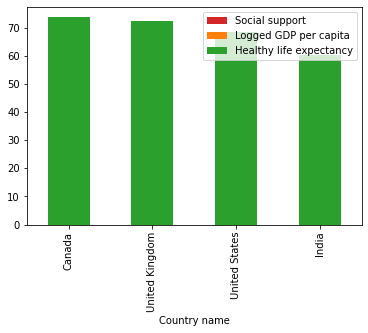

In [27]:

ax = d.plot(y="Social support", x="Country name", kind="bar",color='C3')
d.plot(y="Logged GDP per capita", x="Country name", kind="bar", ax=ax, color="C1")
d.plot(y="Healthy life expectancy", x="Country name", kind="bar", ax=ax, color="C2")

plt.show()


**Freedom to make life choices vs Generosity vs Corruption**

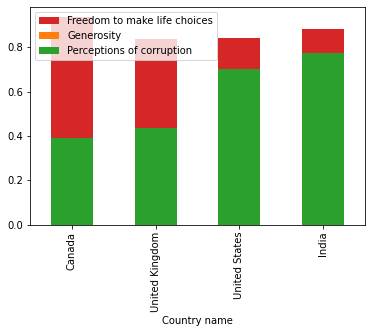

In [28]:
ax = d.plot(y="Freedom to make life choices", x="Country name", kind="bar",color='C3')
d.plot(y="Generosity", x="Country name", kind="bar", ax=ax, color="C1",)
d.plot(y="Perceptions of corruption", x="Country name", kind="bar", ax=ax, color="C2",)

plt.show()

**Geographic Visualization of Happiness Score**

In [29]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['Country name'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['score'], 
           text = df['Country name'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

**Checking out previous happiness reports to see changes in attribute distribution**

In [30]:
df15=pd.read_csv('/home/akash/Desktop/Project/2020.csv')

In [31]:
df15.head(2)

Country name Regional indicator   score  Logged GDP per capita  \
0      Finland     Western Europe  7.8087              10.639267   
1      Denmark     Western Europe  7.6456              10.774001   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0        0.954330                71.900825                      0.949172   
1        0.955991                72.402504                      0.951444   

   Generosity  Perceptions of corruption  
0   -0.059482                   0.195445  
1    0.066202                   0.168489

**Lets consider Economy(monetary),Social Support(family) and Health as primary concerns for an individual residing in a country i.e overall wellbeing.Lets see how these distributions are altering over the years or are staying stagnant.**

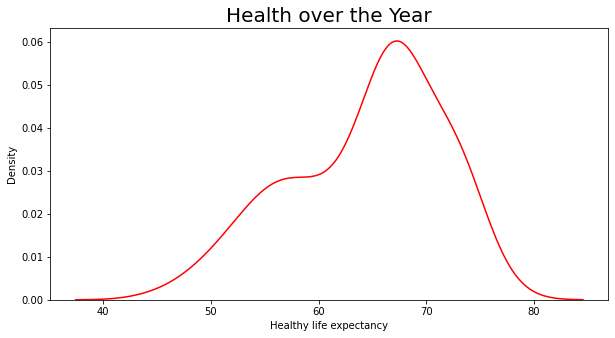

In [39]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Healthy life expectancy'],color='red')
plt.title('Health over the Year',size=20)
plt.show()

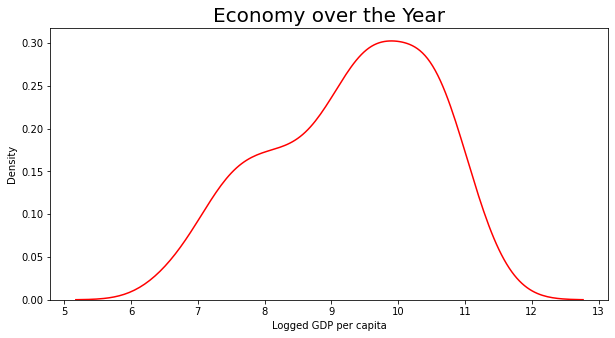

In [38]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Logged GDP per capita'],color='red')
plt.title('Economy over the Year',size=20)
plt.show()

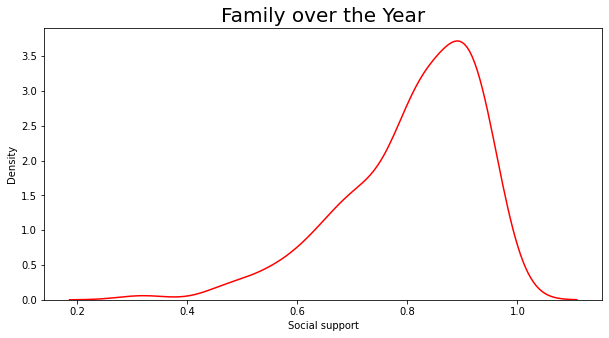

In [41]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Social support'],color='red')
plt.title('Family over the Year',size=20)
plt.show()

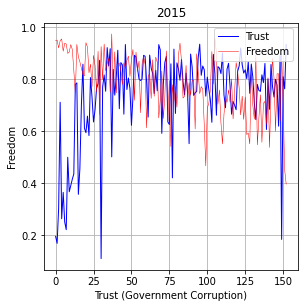

In [42]:
fig = plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
df15["Perceptions of corruption"].plot(kind='line', color='blue',label='Trust',linewidth=1,grid=True,linestyle="-")
df15["Freedom to make life choices"].plot(kind="line", color="red", label="Freedom", linewidth=0.5,grid=True,linestyle="-")
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Freedom')
plt.title('2015')
plt.legend(loc='upper right')
plt.show()


**Adding new attribute Year**

In [30]:
df15['Year']='2020'


In [44]:


df15.rename(columns={'Logged GDP per Capita':'GDP per capita'},inplace=True)
data2=df15.filter(['Country name','Logged GDP per capita',"Year"],axis=1)



#data2=data2.append([data3,data4,data5,data1])

# **HIERARCHICAL CLUSTERING*

In [55]:
original=original.drop(['Country name','Regional indicator'],axis=1)

In [56]:

from sklearn.preprocessing import normalize
data_scaled = normalize(original)
data_scaled = pd.DataFrame(data_scaled, columns=original.columns)
datasc=data_scaled.copy()
data_scaled.head()

score  Logged GDP per capita  Social support  Healthy life expectancy  \
0  0.106801               0.145515        0.013053                 0.983398   
1  0.103866               0.146365        0.012987                 0.983589   
2  0.100391               0.145808        0.012521                 0.984041   
3  0.101156               0.145207        0.013138                 0.983993   
4  0.100610               0.148977        0.012798                 0.983534   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                      0.012982   -0.000814                   0.002673  
1                      0.012925    0.000899                   0.002289  
2                      0.012235    0.001406                   0.004033  
3                      0.012790    0.003329                   0.009593  
4                      0.012842    0.001808                   0.003537

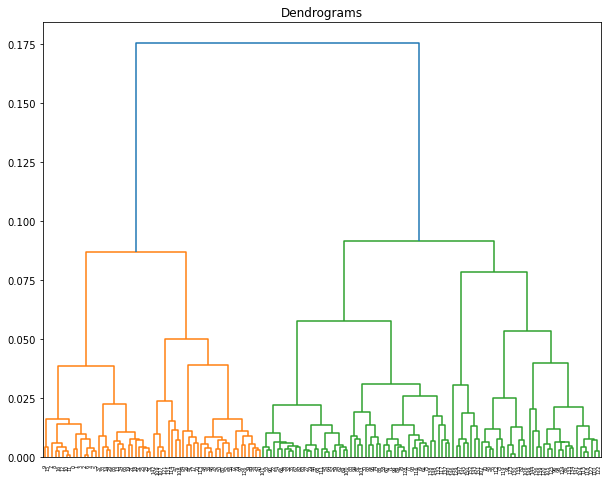

In [57]:

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples.

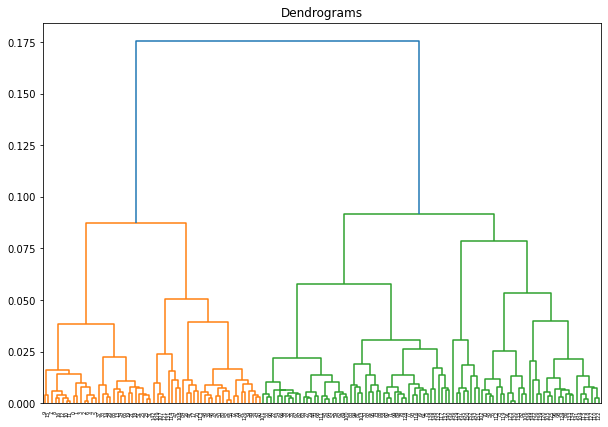

In [58]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.5, color='r', linestyle='--')

**We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters**

In [59]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

* **0-belongs to cluster number 1**
* **1-belongs to cluster number 2**

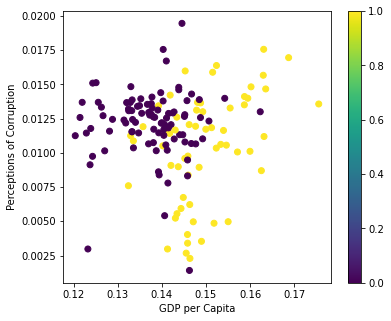

In [65]:
plt.figure(figsize=(6, 5))  
plt.scatter(data_scaled['Logged GDP per capita'], data_scaled['Perceptions of corruption'], c=cluster.labels_) 
plt.xlabel('GDP per Capita')
plt.ylabel('Perceptions of Corruption')
plt.colorbar()

**So here we can clearly see two well defined clusters**

# **K MEANS CLUSTERING**

Let’s pick these two variables and visualize the data points

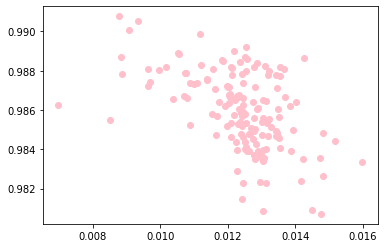

In [62]:
X = datasc[["Social support","Healthy life expectancy"]]
plt.scatter(X["Social support"],X["Healthy life expectancy"],c='pink')
plt.show()

**Now on performing K MEANS CLUSTERING with 3 clusters**

[[0.01307067 0.98414093]
 [0.01253046 0.98716655]
 [0.00997498 0.98801529]]


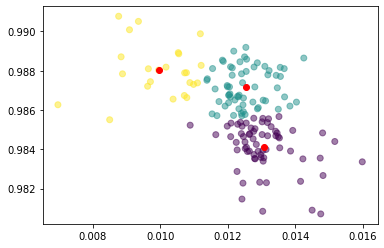

In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Social support'], X['Healthy life expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

**So here we can clearly see three well defined clusters with their centroids**